In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
"""
A2-Part-1: Generate a sinusoid

Write a function to generate a real sinusoid (use np.cos()) given its amplitude A, frequency f (Hz), initial phase phi (radians), 
sampling rate fs (Hz) and duration t (seconds). 

All the input arguments to this function (A, f, phi, fs and t) are real numbers such that A, t and fs are 
positive, and fs > 2*f to avoid aliasing. The function should return a numpy array x of the generated 
sinusoid.

EXAMPLE: If you run your code using A=1.0, f = 10.0, phi = 1.0, fs = 50.0 and t = 0.1, the output numpy 
array should be: array([ 0.54030231, -0.63332387, -0.93171798,  0.05749049,  0.96724906])
"""
def genSine(A, f, phi, fs, t):
    """
    Inputs:
        A (float) =  amplitude of the sinusoid
        f (float) = frequency of the sinusoid in Hz
        phi (float) = initial phase of the sinusoid in radians
        fs (float) = sampling frequency of the sinusoid in Hz
        t (float) =  duration of the sinusoid (is second)
    Output:
        The function should return a numpy array
        x (numpy array) = The generated sinusoid (use np.cos())
    """
    n = np.arange(fs*t)
    return A*np.cos(2*np.pi*f*n*1/fs + phi)

In [8]:
print('Testing result {}'.format(genSine(A = 1, f = 10.0, phi = 1.0, fs = 50, t = 0.1)))

Testing result [ 0.54030231 -0.63332387 -0.93171798  0.05749049  0.96724906]


<Container object of 3 artists>

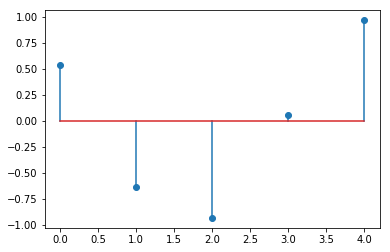

In [18]:
plt.stem(genSine(A = 1, f = 10.0, phi = 1.0, fs = 50, t = 0.1))

In [9]:
"""
A2-Part-2: Generate a complex sinusoid 

Write a function to generate the complex sinusoid that is used in DFT computation of length N (samples), 
corresponding to the frequency index k. Note that the complex sinusoid used in DFT computation has a 
negative sign in the exponential function.

The amplitude of such a complex sinusoid is 1, the length is N, and the frequency in radians is 2*pi*k/N.

The input arguments to the function are two positive integers, k and N, such that k < N-1. 
The function should return cSine, a numpy array of the complex sinusoid.

EXAMPLE: If you run your function using N=5 and k=1, the function should return the following numpy array cSine:
array([ 1.0 + 0.j,  0.30901699 - 0.95105652j, -0.80901699 - 0.58778525j, -0.80901699 + 0.58778525j, 
0.30901699 + 0.95105652j])
"""
def genComplexSine(k, N):
    """
    Inputs:
        k (integer) = frequency index of the complex sinusoid of the DFT
        N (integer) = length of complex sinusoid in samples
    Output:
        The function should return a numpy array
        cSine (numpy array) = The generated complex sinusoid (length N)
    """
    n = np.arange(N)
    return np.exp(-1j*2*np.pi*k*n/N)

In [10]:
print('Testing result {}'.format(genComplexSine(k=1, N=5)))

Testing result [ 1.        +0.j          0.30901699-0.95105652j -0.80901699-0.58778525j
 -0.80901699+0.58778525j  0.30901699+0.95105652j]


<Container object of 3 artists>

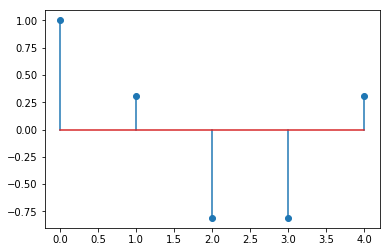

In [20]:
plt.stem(np.real(genComplexSine(k=1, N=5)))

In [25]:
"""
A2-Part-3: Implement the discrete Fourier transform (DFT)

Write a function that implements the discrete Fourier transform (DFT). Given a sequence x of length
N, the function should return its DFT, its spectrum of length N with the frequency indexes ranging from 0 
to N-1.

The input argument to the function is a numpy array x and the function should return a numpy array X which 
is of the DFT of x.

EXAMPLE: If you run your function using x = np.array([1, 2, 3, 4]), the function shoulds return the following numpy array:
array([10.0 + 0.0j,  -2. +2.0j,  -2.0 - 9.79717439e-16j, -2.0 - 2.0j])

Note that you might not get an exact 0 in the output because of the small numerical errors due to the
limited precision of the data in your computer. Usually these errors are of the order 1e-15 depending
on your machine.
"""
def DFT(x):
    """
    Input:
        x (numpy array) = input sequence of length N
    Output:
        The function should return a numpy array of length N
        X (numpy array) = The N point DFT of the input sequence x
    """
    X = np.array([])
    for k in range(len(x)):
        s = np.exp(1j*2*np.pi*k/len(x) * np.arange(len(x)))
        X = np.append(X, np.sum(x*np.conjugate(s)))
    return X
        

In [47]:
x = np.array([1, 0, 0, 0])

In [48]:
print('Testing result {}'.format(DFT(x)))

Testing result [1.+0.j 1.+0.j 1.+0.j 1.+0.j]


<Container object of 3 artists>

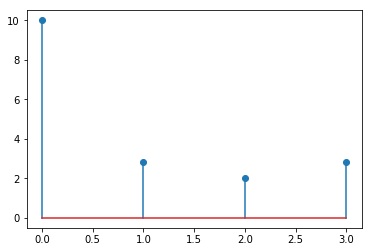

In [38]:
plt.stem(np.abs(DFT(x)))

<Container object of 3 artists>

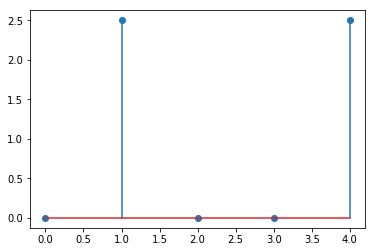

In [40]:
plt.stem(np.abs(DFT(genSine(A = 1, f = 10.0, phi = 1.0, fs = 50, t = 0.1))))

In [44]:
import numpy as np

"""
A2-Part-4: Implement the inverse discrete Fourier transform (IDFT)

Write a function that implements the inverse discrete Fourier transform (IDFT). Given a frequency 
spectrum X of length N, the function should return its IDFT x, also of length N. Assume that the 
frequency index of the input spectrum ranges from 0 to N-1.

The input argument to the function is a numpy array X of the frequency spectrum and the function should return 
a numpy array of the IDFT of X.

Remember to scale the output appropriately.

EXAMPLE: If you run your function using X = np.array([1 ,1 ,1 ,1]), the function should return the following numpy 
array x: array([  1.00000000e+00 +0.00000000e+00j,   -4.59242550e-17 +5.55111512e-17j,
    0.00000000e+00 +6.12323400e-17j,   8.22616137e-17 +8.32667268e-17j])

Notice that the output numpy array is essentially [1, 0, 0, 0]. Instead of exact 0 we get very small
numerical values of the order of 1e-15, which can be ignored. Also, these small numerical errors are 
machine dependent and might be different in your case.

In addition, an interesting test of the IDFT function can be done by providing the output of the DFT of 
a sequence as the input to the IDFT. See if you get back the original time domain sequence.

"""
def IDFT(X):
    """
    Input:
        X (numpy array) = frequency spectrum (length N)
    Output:
        The function should return a numpy array of length N 
        x (numpy array) = The N point IDFT of the frequency spectrum X
    """
    x = np.array([])
    for k in range(len(X)):
        s = np.exp(1j*2*np.pi*k/len(X)*np.arange(len(X)))
        x = np.append(x, np.sum(X*s))
    return x/len(X)

In [49]:
X = np.array([1 ,1 ,1 ,1])

In [46]:
IDFT(X)

array([ 1.00000000e+00+0.00000000e+00j, -5.55111512e-17+2.77555756e-17j,
        0.00000000e+00+6.12323400e-17j,  8.32667268e-17+1.11022302e-16j])